# Parameter estimation using qualitative data

This Notebook eplains the use of qualitative data for parameter estimation, as described in [Schmiester et al. (2019)](https://www.biorxiv.org/content/10.1101/848648v1.abstract). An example model is provided in `example_qualitative`

## Import model and create pyPESTO objective

In [1]:
import pypesto
import pypesto.petab
import pypesto.optimize as optimize

import amici
import petab
import numpy as np
from pypesto.hierarchical.optimal_scaling_approach.optimal_scaling_solver import OptimalScalingInnerSolver
import pypesto.logging
import logging

In [2]:
petab_folder = './example_qualitative/'
yaml_file = 'example_qualitative.yaml'

petab_problem = petab.Problem.from_yaml(petab_folder + yaml_file)

# To allow for optimization with ordinal measurements, set ordinal=True, when creating the importer
importer = pypesto.petab.PetabImporter(petab_problem, ordinal=True)

model = importer.create_model()

Compiling amici model to folder /Users/zebo/Documents/PhD/Projects/pypesto_amici_dev/dev_venv/pyPESTO/doc/example/amici_models/Raf_Mitra_NatCom2018OptimalScaling_3CatQual.
2023-01-31 15:39:52.618 - amici.petab_import - INFO - Importing model ...
2023-01-31 15:39:52.619 - amici.petab_import - INFO - Validating PEtab problem ...
2023-01-31 15:39:52.629 - amici.petab_import - INFO - Model name is 'Raf_Mitra_NatCom2018OptimalScaling_3CatQual'.
Writing model code to '/Users/zebo/Documents/PhD/Projects/pypesto_amici_dev/dev_venv/pyPESTO/doc/example/amici_models/Raf_Mitra_NatCom2018OptimalScaling_3CatQual'.
2023-01-31 15:39:52.629 - amici.petab_import - INFO - Species: 6
2023-01-31 15:39:52.629 - amici.petab_import - INFO - Global parameters: 9
2023-01-31 15:39:52.630 - amici.petab_import - INFO - Reactions: 6
2023-01-31 15:39:52.634 - amici.petab_import - INFO - Observables: 2
2023-01-31 15:39:52.635 - amici.petab_import - INFO - Sigmas: 2
2023-01-31 15:39:52.636 - amici.petab_import - DEBUG

running AmiciInstall
hdf5.h found in /opt/homebrew/Cellar/hdf5/1.12.2_2/include
libhdf5.a found in /opt/homebrew/Cellar/hdf5/1.12.2_2/lib
running build_ext
Changed extra_compile_args for unix to ['-std=c++14']
Building model extension in /Users/zebo/Documents/PhD/Projects/pypesto_amici_dev/dev_venv/pyPESTO/doc/example/amici_models/Raf_Mitra_NatCom2018OptimalScaling_3CatQual
building 'Raf_Mitra_NatCom2018OptimalScaling_3CatQual._Raf_Mitra_NatCom2018OptimalScaling_3CatQual' extension
Testing SWIG executable swig4.0... FAILED.
Testing SWIG executable swig3.0... FAILED.
Testing SWIG executable swig... SUCCEEDED.
swigging swig/Raf_Mitra_NatCom2018OptimalScaling_3CatQual.i to swig/Raf_Mitra_NatCom2018OptimalScaling_3CatQual_wrap.cpp
swig -python -c++ -modern -outdir Raf_Mitra_NatCom2018OptimalScaling_3CatQual -I/Users/zebo/Documents/PhD/Projects/pypesto_amici_dev/dev_venv/lib/python3.10/site-packages/amici/swig -I/Users/zebo/Documents/PhD/Projects/pypesto_amici_dev/dev_venv/lib/python3.10/si

2023-01-31 15:40:03.629 - amici.petab_import - INFO - Finished Importing PEtab model                (1.10E+01s)


In [26]:
objective = importer.create_objective()
problem = importer.create_problem(objective)

engine = pypesto.engine.SingleCoreEngine()

optimizer = optimize.ScipyOptimizer(method='Nelder-Mead',
                                   options={'disp': True, 'maxiter': 500, 'maxfev': 500, 'fatol': 1e-10})
n_starts = 10
np.random.seed(n_starts)

## Run optimization using optimal scaling approach

Different options can be used for the optimal scaling approach:
- method: `standard` / `reduced`
- reparameterized: `True` / `False`
- intervalConstraints: `max` / `max-min`
- minGap: Any float value

It is recommended to use the reduced method with reparameterization as it is the most efficient and robust choice.

When no options are provided, the default is the reduced and reparameterized formulation with max as interval constraint and `minGap=1e-10`.

### Run optimization using the reduced and reparameterized approach

In [27]:
problem.objective.calculator.inner_solver = OptimalScalingInnerSolver(options={'method': 'reduced',
                                                                               'reparameterized': True,
                                                                               'intervalConstraints': 'max',
                                                                               'minGap': 1e-10})

res_reduced_reparameterized = optimize.minimize(problem, n_starts=n_starts, optimizer=optimizer, engine=engine)

 10%|█         | 1/10 [00:02<00:25,  2.81s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 146
         Function evaluations: 271


 20%|██        | 2/10 [00:03<00:14,  1.79s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 48
         Function evaluations: 90


 30%|███       | 3/10 [00:05<00:12,  1.85s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 90
         Function evaluations: 169


 40%|████      | 4/10 [00:06<00:08,  1.37s/it]

Optimization terminated successfully.
         Current function value: 0.001989
         Iterations: 36
         Function evaluations: 68


 50%|█████     | 5/10 [00:07<00:06,  1.24s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 45
         Function evaluations: 91


 60%|██████    | 6/10 [00:08<00:05,  1.28s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 58
         Function evaluations: 109


 70%|███████   | 7/10 [00:10<00:04,  1.34s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 68
         Function evaluations: 132


 80%|████████  | 8/10 [00:11<00:02,  1.30s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 54
         Function evaluations: 102


 90%|█████████ | 9/10 [00:13<00:01,  1.40s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 81
         Function evaluations: 147


100%|██████████| 10/10 [00:14<00:00,  1.44s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 60
         Function evaluations: 110


### Run optimization using the reduced non-reparameterized approach

In [28]:
problem.objective.calculator.inner_solver = OptimalScalingInnerSolver(options={'method': 'reduced',
                                                                               'reparameterized': False,
                                                                               'intervalConstraints': 'max',
                                                                               'minGap': 1e-10})

res_reduced = optimize.minimize(problem, n_starts=n_starts, optimizer=optimizer, engine=engine)

 10%|█         | 1/10 [00:01<00:15,  1.76s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 88
         Function evaluations: 166


 20%|██        | 2/10 [00:03<00:13,  1.65s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 75
         Function evaluations: 140


 30%|███       | 3/10 [00:04<00:10,  1.50s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 64
         Function evaluations: 119


 40%|████      | 4/10 [00:05<00:08,  1.41s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 59
         Function evaluations: 109


 50%|█████     | 5/10 [00:06<00:06,  1.26s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 42
         Function evaluations: 83


 60%|██████    | 6/10 [00:08<00:06,  1.51s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 94
         Function evaluations: 172


 70%|███████   | 7/10 [00:10<00:04,  1.63s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 89
         Function evaluations: 168


 80%|████████  | 8/10 [00:11<00:02,  1.29s/it]

Optimization terminated successfully.
         Current function value: 0.001989
         Iterations: 33
         Function evaluations: 64


 90%|█████████ | 9/10 [00:13<00:01,  1.46s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 83
         Function evaluations: 161


100%|██████████| 10/10 [00:14<00:00,  1.43s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 46
         Function evaluations: 89


### Run optimization using the standard approach

In [29]:
problem.objective.calculator.inner_solver = OptimalScalingInnerSolver(options={'method': 'standard',
                                                                               'reparameterized': False,
                                                                               'intervalConstraints': 'max',
                                                                               'minGap': 1e-10})

res_standard = optimize.minimize(problem, n_starts=n_starts, optimizer=optimizer, engine=engine)

 10%|█         | 1/10 [00:01<00:13,  1.48s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 59
         Function evaluations: 112


 20%|██        | 2/10 [00:02<00:08,  1.03s/it]

Optimization terminated successfully.
         Current function value: 0.001989
         Iterations: 34
         Function evaluations: 69


 30%|███       | 3/10 [00:04<00:11,  1.58s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 104
         Function evaluations: 186


 40%|████      | 4/10 [00:07<00:13,  2.17s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 152
         Function evaluations: 277


 50%|█████     | 5/10 [00:11<00:13,  2.75s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 183
         Function evaluations: 342


 60%|██████    | 6/10 [00:13<00:10,  2.62s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 116
         Function evaluations: 213


 70%|███████   | 7/10 [00:15<00:07,  2.52s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 113
         Function evaluations: 200


 80%|████████  | 8/10 [00:17<00:04,  2.18s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 65
         Function evaluations: 119


 90%|█████████ | 9/10 [00:20<00:02,  2.32s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 104
         Function evaluations: 200


100%|██████████| 10/10 [00:22<00:00,  2.23s/it]

Optimization terminated successfully.
         Current function value: 0.000574
         Iterations: 103
         Function evaluations: 190


### Compare results

Reduced formulation leads to improved computation times

In [30]:
time_standard = res_standard.optimize_result.get_for_key('time')
print(f"Mean computation time for standard approach: {np.mean(time_standard)}")

time_reduced = res_reduced.optimize_result.get_for_key('time')
print(f"Mean computation time for reduced approach: {np.mean(time_reduced)}")

time_reduced_reparameterized = res_reduced_reparameterized.optimize_result.get_for_key('time')
print(f"Mean computation time for reduced reparameterized approach: {np.mean(time_reduced_reparameterized)}")

Mean computation time for standard approach: 2.22789306640625
Mean computation time for reduced approach: 1.4259209632873535
Mean computation time for reduced reparameterized approach: 1.440309739112854


All approaches yield the same objective function values

<AxesSubplot: title={'center': 'Waterfall plot'}, xlabel='Ordered optimizer run', ylabel='Objective value (offset=9.994e-01)'>

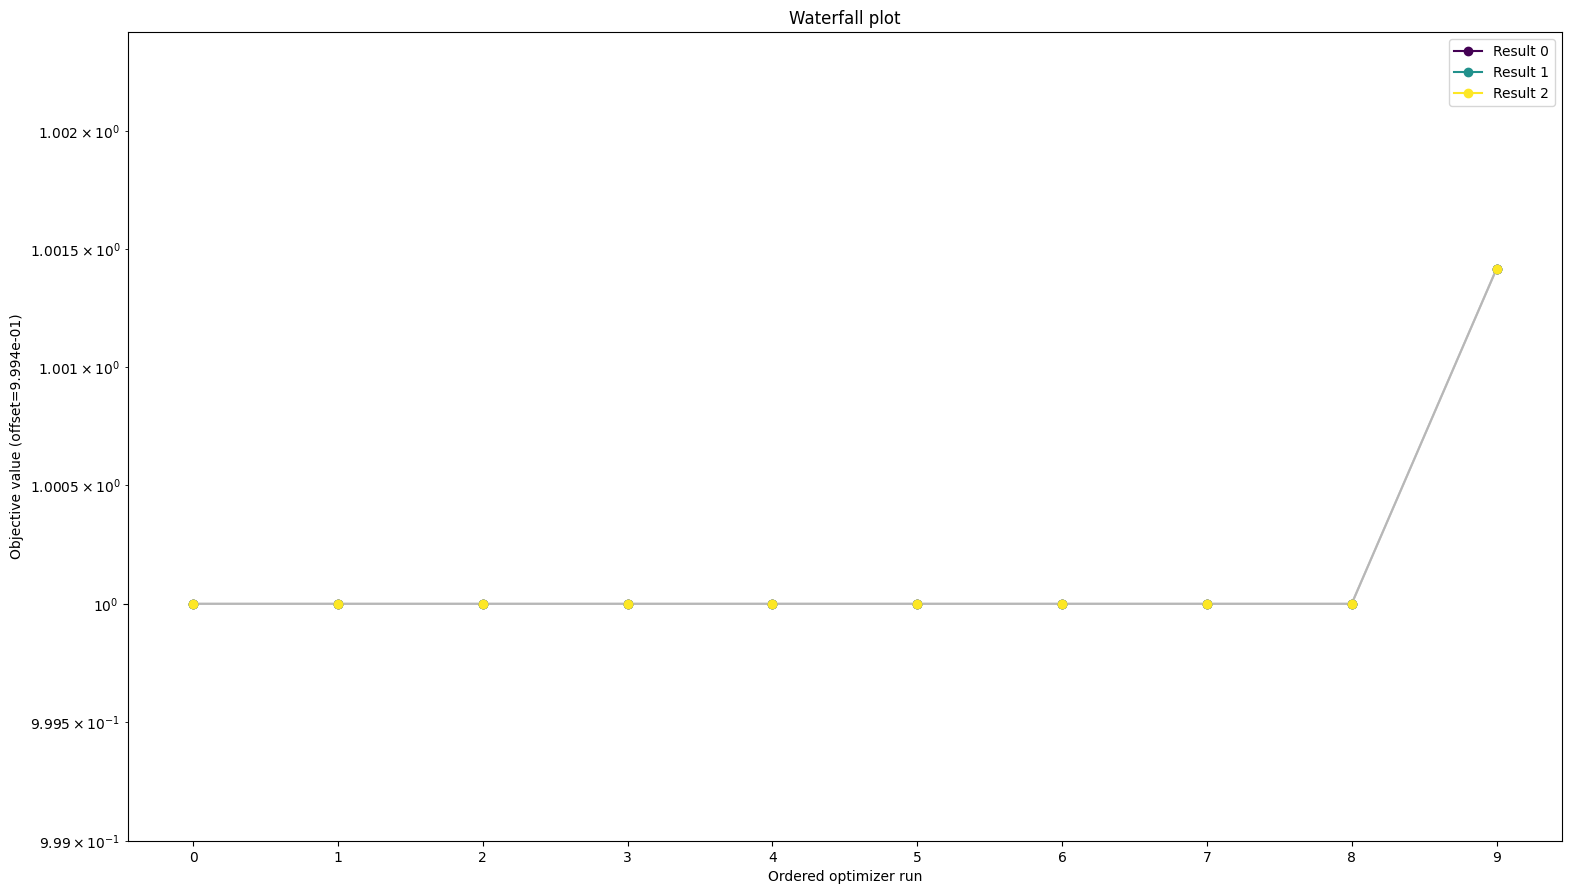

In [31]:
from pypesto.visualize import waterfall

waterfall([res_standard, res_reduced, res_reduced_reparameterized])